In [1]:
import turicreate as tc

In [2]:
sales = tc.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')

Finished parsing file /Users/yh/Documents/Learn/Machine Learning Specialization - Coursera/Regression/Code/01 Simple Linear Regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.066746 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/yh/Documents/Learn/Machine Learning Specialization - Coursera/Regression/Code/01 Simple Linear Regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.011237 secs.

In [3]:
sales

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


# Exploring the data

The house price in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.

In [5]:
tc.show(sales["CrimeRate"], sales["HousePrice"]) #x, y

Materializing X axis SArray

Materializing Y axis SArray

## Fit the regression model using crime as the feature

In [6]:
crime_model = tc.linear_regression.create(
    sales,
    target="HousePrice",
    features=['CrimeRate'],
    validation_set=None,
    verbose=False
)

## See what the fit looks like

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

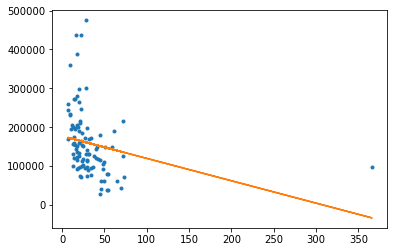

In [9]:
plt.plot(sales['CrimeRate'], sales['HousePrice'], '.',
        sales['CrimeRate'], crime_model.predict(sales), '-')

## Remove Center City (outlier) and redo analysis

In [10]:
sales_noCC = sales[sales['MilesPhila'] != 0.0]
#keep those with non-zero miles away from center of philly

In [11]:
tc.show(sales_noCC["CrimeRate"], sales_noCC["HousePrice"])

Materializing X axis SArray

Materializing Y axis SArray

## Refit our simple regression model on this modified dataset

In [16]:
crime_model_noCC = tc.linear_regression.create(
    sales_noCC,
    target="HousePrice",
    features=['CrimeRate'],
    validation_set=None,
    verbose=False
)

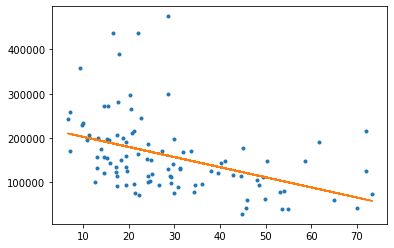

In [17]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
        sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

## Compare coefficients for full-data fit vs no-Center-City fit

In [20]:
crime_model.coefficients

name,index,value,stderr
(intercept),None,176626.04688088183,11245.588219378817
CrimeRate,None,-576.8049490581076,226.9022595096533


In [21]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309843,16404.02475138665
CrimeRate,None,-2287.6971744328944,491.53747812308944


So are the 5 towns/observations that have the highest y values also influential observations?

## Remove high-value outlier towns and redo analysis

In [22]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]
crime_model_nohighend = tc.linear_regression.create(
sales_nohighend,
target='HousePrice',
features=['CrimeRate'],
validation_set=None,
verbose=False)

In [23]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309843,16404.02475138665
CrimeRate,None,-2287.6971744328944,491.53747812308944


In [24]:
crime_model_nohighend.coefficients

name,index,value,stderr
(intercept),None,199073.5896152512,11932.510110455862
CrimeRate,None,-1837.712809888722,351.5196093328531


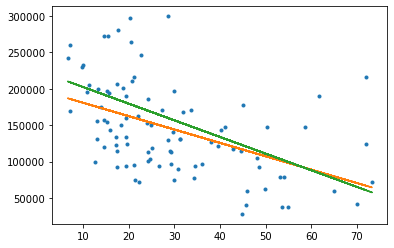

In [25]:
plt.plot(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'], '.',
         sales_nohighend['CrimeRate'], crime_model_nohighend.predict(sales_nohighend), '-',
         sales_nohighend['CrimeRate'], crime_model_noCC.predict(sales_nohighend), '-')         